In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the CSV, skipping the metadata/header rows
df = pd.read_csv('Kanishk_K562_TNFA_Validation_Optical_Results.csv', skiprows=19)

# Select relevant columns and drop rows with missing values
df = df[['Sample', 'Biological Set Name', 'Cq']].dropna()

# Extract numeric time for sorting (e.g., "10 min" -> 10)
def extract_time(s):
    match = re.match(r'(\d+)\s*min', str(s))
    return int(match.group(1)) if match else -1

# Create a new column for sorting
df['time_numeric'] = df['Biological Set Name'].apply(extract_time)

# Get unique Biological Set Names and sort them by extracted time
sorted_time_names = df.drop_duplicates('Biological Set Name').sort_values('time_numeric')['Biological Set Name']

# Pivot the table
pivot = df.pivot(index='Sample', columns='Biological Set Name', values='Cq')

# Reindex columns to ensure correct order
pivot = pivot.reindex(columns=sorted_time_names)

pivot_table=pivot

pivot_table

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,20.167819,20.057232,20.032432,20.162431,20.184199,20.323662,20.301582,20.242956,20.251312,20.054655,20.240633,20.300083
GAPDH,21.432254,21.114981,21.073946,21.137320,20.904244,21.168053,21.009488,21.048110,20.973592,20.769913,20.765195,20.187977
HPRT1,29.886828,29.958761,30.046877,30.193573,29.970664,30.576978,30.232387,31.233056,30.099213,30.102881,30.227369,30.441267
ICAM1,26.574846,26.325522,25.723978,23.702137,22.447005,22.015139,21.482922,21.353166,20.881415,20.612188,20.579137,20.791574
IER3,26.882741,26.473618,24.288434,23.268375,22.756264,22.959706,23.012005,22.984936,22.782780,22.935748,22.817715,23.383582
IL8,30.369014,30.748940,29.307146,28.438746,27.953410,28.294158,28.263602,28.155412,27.720445,27.881261,27.712730,27.757117
NFKBIA,26.347702,25.626266,23.297582,22.464121,22.000991,22.033389,21.984129,21.982766,21.805209,21.947809,22.016316,22.263624
TNFRSF9,36.513770,35.399690,34.987913,31.495087,30.034275,30.142218,29.225559,28.909810,28.081962,28.056233,28.109982,28.587318


In [2]:
#ACTB has more stable expression. Selecting it for Normalization. Also had Pipetting error for last GAPDH Sample at 110min. Ran out of RT-PCR Mix
#Getting Delta Ct
#Dropping HPRT1 and GAPDH from Analysis
pivot_table = pivot_table.drop(['HPRT1', 'GAPDH'], axis=0)
pivot_table

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,20.167819,20.057232,20.032432,20.162431,20.184199,20.323662,20.301582,20.242956,20.251312,20.054655,20.240633,20.300083
ICAM1,26.574846,26.325522,25.723978,23.702137,22.447005,22.015139,21.482922,21.353166,20.881415,20.612188,20.579137,20.791574
IER3,26.882741,26.473618,24.288434,23.268375,22.756264,22.959706,23.012005,22.984936,22.782780,22.935748,22.817715,23.383582
IL8,30.369014,30.748940,29.307146,28.438746,27.953410,28.294158,28.263602,28.155412,27.720445,27.881261,27.712730,27.757117
NFKBIA,26.347702,25.626266,23.297582,22.464121,22.000991,22.033389,21.984129,21.982766,21.805209,21.947809,22.016316,22.263624
TNFRSF9,36.513770,35.399690,34.987913,31.495087,30.034275,30.142218,29.225559,28.909810,28.081962,28.056233,28.109982,28.587318


In [3]:
#Getting Delta Ct
delta_ct = pivot_table.sub(pivot_table.loc['ACTB'], axis=1)
delta_ct

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ICAM1,6.407027,6.268290,5.691546,3.539706,2.262807,1.691477,1.181340,1.110209,0.630103,0.557533,0.338504,0.491491
IER3,6.714922,6.416386,4.256002,3.105945,2.572066,2.636043,2.710423,2.741980,2.531469,2.881093,2.577082,3.083500
IL8,10.201196,10.691708,9.274714,8.276315,7.769211,7.970496,7.962020,7.912455,7.469134,7.826606,7.472096,7.457035
NFKBIA,6.179883,5.569034,3.265150,2.301690,1.816792,1.709727,1.682548,1.739810,1.553897,1.893154,1.775683,1.963542
TNFRSF9,16.345951,15.342458,14.955481,11.332656,9.850076,9.818556,8.923977,8.666854,7.830650,8.001578,7.869348,8.287236


In [4]:
#Setting first timepoint as control
control_delta_ct = delta_ct['0 min']
#Getting Delta Delta Ct
delta_delta_ct = delta_ct.sub(control_delta_ct, axis=0)
delta_delta_ct

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ICAM1,0.0,-0.138737,-0.715481,-2.867320,-4.144220,-4.715550,-5.225687,-5.296818,-5.776924,-5.849494,-6.068523,-5.915536
IER3,0.0,-0.298537,-2.458920,-3.608977,-4.142857,-4.078879,-4.004499,-3.972942,-4.183453,-3.833829,-4.137840,-3.631422
IL8,0.0,0.490512,-0.926481,-1.924881,-2.431984,-2.230699,-2.239175,-2.288740,-2.732062,-2.374590,-2.729099,-2.744161
NFKBIA,0.0,-0.610849,-2.914733,-3.878193,-4.363090,-4.470156,-4.497335,-4.440073,-4.625986,-4.286728,-4.404200,-4.216341
TNFRSF9,0.0,-1.003493,-1.390470,-5.013295,-6.495875,-6.527395,-7.421974,-7.679097,-8.515300,-8.344372,-8.476603,-8.058715


In [5]:
#Getting Fold Change
fold_change = 2 ** (-delta_delta_ct) 
fold_change #Values have too high a range will plot -delta_delta_ct only

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ICAM1,1.0,1.100941,1.642031,7.297086,17.682132,26.273752,37.418690,39.309816,54.831152,57.659786,67.113111,60.360620
IER3,1.0,1.229896,5.498051,12.201422,17.665425,16.899149,16.049978,15.702719,18.169583,14.259277,17.604103,12.392732
IL8,1.0,0.711772,1.900635,3.797054,5.396351,4.693615,4.721271,4.886292,6.644045,5.185883,6.630415,6.699999
NFKBIA,1.0,1.527158,7.540882,14.704572,20.578849,22.164143,22.585663,21.706772,24.692237,19.517933,21.173676,18.588537
TNFRSF9,1.0,2.004848,2.621641,32.296249,90.251244,92.244751,171.489161,204.945572,365.898699,325.017229,356.214517,266.633697


In [6]:
positive_ddct=-delta_delta_ct
positive_ddct #Changing sign

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
ICAM1,-0.0,0.138737,0.715481,2.867320,4.144220,4.715550,5.225687,5.296818,5.776924,5.849494,6.068523,5.915536
IER3,-0.0,0.298537,2.458920,3.608977,4.142857,4.078879,4.004499,3.972942,4.183453,3.833829,4.137840,3.631422
IL8,-0.0,-0.490512,0.926481,1.924881,2.431984,2.230699,2.239175,2.288740,2.732062,2.374590,2.729099,2.744161
NFKBIA,-0.0,0.610849,2.914733,3.878193,4.363090,4.470156,4.497335,4.440073,4.625986,4.286728,4.404200,4.216341
TNFRSF9,-0.0,1.003493,1.390470,5.013295,6.495875,6.527395,7.421974,7.679097,8.515300,8.344372,8.476603,8.058715


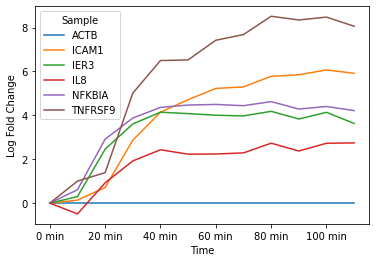

In [7]:
positive_ddct.T.plot(xlabel="Time", ylabel="Log Fold Change")
plt.savefig("qPCR_GenePlots_Log_Fold_Validation.svg", format='svg')

So a Time Delay before the activation of TNFRSF9 and ICAM1 is evident in the qPCR data as well.

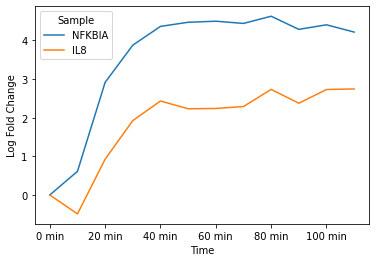

In [8]:
positive_ddct.T[["NFKBIA","IL8"]].plot(xlabel="Time", ylabel="Log Fold Change")
plt.savefig("qPCR_GenePlots_Log_Fold_Validation_NFKBIA_IL8.svg", format='svg')

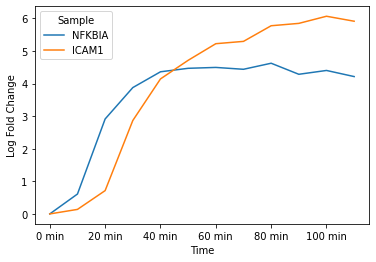

In [9]:
positive_ddct.T[["NFKBIA","ICAM1"]].plot(xlabel="Time", ylabel="Log Fold Change")
plt.savefig("qPCR_GenePlots_Log_Fold_Validation_NFKBIA_ICAM1.svg", format='svg')

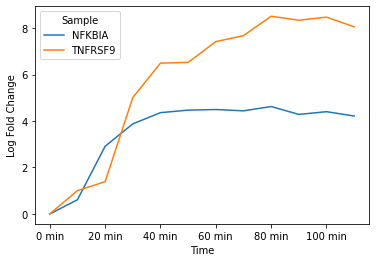

In [10]:
positive_ddct.T[["NFKBIA","TNFRSF9"]].plot(xlabel="Time", ylabel="Log Fold Change")
plt.savefig("qPCR_GenePlots_Log_Fold_Validation_NFKBIA_TNFRSF9.svg", format='svg')

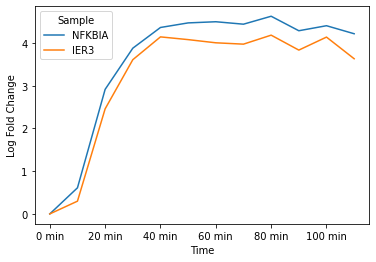

In [11]:
positive_ddct.T[["NFKBIA","IER3"]].plot(xlabel="Time", ylabel="Log Fold Change")
plt.savefig("qPCR_GenePlots_Log_Fold_Validation_NFKBIA_IER3.svg", format='svg')

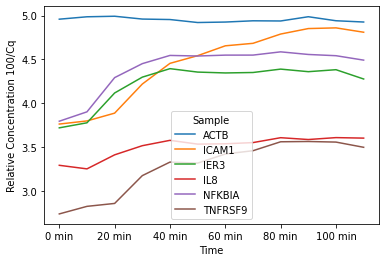

In [12]:
(100/pivot_table).T.plot(xlabel="Time",ylabel="Relative Concentration 100/Cq")
plt.savefig("qPCR_GenePlots_Relative_concentration_100DivCq.svg", format='svg')